In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/archive.zip" -d "/content/"


Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/annotations/Cars0.xml  
  inflating: /content/annotations/Cars1.xml  
  inflating: /content/annotations/Cars10.xml  
  inflating: /content/annotations/Cars100.xml  
  inflating: /content/annotations/Cars101.xml  
  inflating: /content/annotations/Cars102.xml  
  inflating: /content/annotations/Cars103.xml  
  inflating: /content/annotations/Cars104.xml  
  inflating: /content/annotations/Cars105.xml  
  inflating: /content/annotations/Cars106.xml  
  inflating: /content/annotations/Cars107.xml  
  inflating: /content/annotations/Cars108.xml  
  inflating: /content/annotations/Cars109.xml  
  inflating: /content/annotations/Cars11.xml  
  inflating: /content/annotations/Cars110.xml  
  inflating: /content/annotations/Cars111.xml  
  inflating: /content/annotations/Cars112.xml  
  inflating: /content/annotations/Cars113.xml  
  inflating: /content/annotations/Cars114.xml  
  inflating: /content/annotations/Cars115.xml  
 

In [3]:
import os
# Vérifier les fichiers
print(os.listdir("/content/annotations"))

['Cars128.xml', 'Cars324.xml', 'Cars195.xml', 'Cars138.xml', 'Cars80.xml', 'Cars356.xml', 'Cars164.xml', 'Cars147.xml', 'Cars201.xml', 'Cars239.xml', 'Cars210.xml', 'Cars9.xml', 'Cars206.xml', 'Cars346.xml', 'Cars51.xml', 'Cars172.xml', 'Cars247.xml', 'Cars115.xml', 'Cars43.xml', 'Cars242.xml', 'Cars65.xml', 'Cars336.xml', 'Cars119.xml', 'Cars38.xml', 'Cars378.xml', 'Cars171.xml', 'Cars17.xml', 'Cars63.xml', 'Cars314.xml', 'Cars208.xml', 'Cars220.xml', 'Cars375.xml', 'Cars300.xml', 'Cars148.xml', 'Cars385.xml', 'Cars100.xml', 'Cars297.xml', 'Cars146.xml', 'Cars116.xml', 'Cars360.xml', 'Cars259.xml', 'Cars230.xml', 'Cars257.xml', 'Cars363.xml', 'Cars158.xml', 'Cars262.xml', 'Cars136.xml', 'Cars111.xml', 'Cars417.xml', 'Cars426.xml', 'Cars163.xml', 'Cars194.xml', 'Cars7.xml', 'Cars305.xml', 'Cars357.xml', 'Cars166.xml', 'Cars176.xml', 'Cars198.xml', 'Cars137.xml', 'Cars56.xml', 'Cars79.xml', 'Cars168.xml', 'Cars391.xml', 'Cars205.xml', 'Cars315.xml', 'Cars48.xml', 'Cars227.xml', 'Cars155

In [4]:
# Vérifier les fichiers
print(os.listdir("/content/images"))

['Cars29.png', 'Cars425.png', 'Cars5.png', 'Cars84.png', 'Cars130.png', 'Cars214.png', 'Cars111.png', 'Cars41.png', 'Cars399.png', 'Cars323.png', 'Cars148.png', 'Cars356.png', 'Cars197.png', 'Cars61.png', 'Cars36.png', 'Cars246.png', 'Cars418.png', 'Cars169.png', 'Cars317.png', 'Cars348.png', 'Cars421.png', 'Cars128.png', 'Cars326.png', 'Cars321.png', 'Cars416.png', 'Cars206.png', 'Cars159.png', 'Cars184.png', 'Cars338.png', 'Cars407.png', 'Cars363.png', 'Cars319.png', 'Cars242.png', 'Cars17.png', 'Cars351.png', 'Cars286.png', 'Cars69.png', 'Cars429.png', 'Cars181.png', 'Cars79.png', 'Cars224.png', 'Cars91.png', 'Cars268.png', 'Cars301.png', 'Cars42.png', 'Cars4.png', 'Cars45.png', 'Cars314.png', 'Cars344.png', 'Cars142.png', 'Cars294.png', 'Cars290.png', 'Cars22.png', 'Cars375.png', 'Cars179.png', 'Cars220.png', 'Cars7.png', 'Cars332.png', 'Cars260.png', 'Cars315.png', 'Cars207.png', 'Cars333.png', 'Cars191.png', 'Cars139.png', 'Cars280.png', 'Cars427.png', 'Cars387.png', 'Cars274.png

In [5]:
import os

image_files = set([f.replace(".png", "") for f in os.listdir("/content/images")])
annotation_files = set([f.replace(".xml", "") for f in os.listdir("/content/annotations")])

# Vérifier les images sans annotations
missing_annotations = image_files - annotation_files
missing_images = annotation_files - image_files

print(f"🚗 Nombre d'images : {len(image_files)}")
print(f"📝 Nombre d'annotations : {len(annotation_files)}")

if missing_annotations:
    print(f"⚠️ Images sans annotations : {missing_annotations}")

if missing_images:
    print(f"⚠️ Annotations sans images : {missing_images}")

if not missing_annotations and not missing_images:
    print("✅ Tout est bon, chaque image a son annotation !")

🚗 Nombre d'images : 433
📝 Nombre d'annotations : 433
✅ Tout est bon, chaque image a son annotation !


In [6]:
import os
import xml.etree.ElementTree as ET

# Dossiers
annotations_dir = "/content/annotations"
images_dir = "/content/images"
labels_dir = "/content/labels"  # Dossier de sortie des annotations YOLO

# Créer le dossier des labels si non existant
os.makedirs(labels_dir, exist_ok=True)

# Dictionnaire des classes
classes = {"licence": 0}  # YOLO utilise des indices numériques pour chaque classe

# Fonction de conversion Pascal VOC → YOLO
def convert_voc_to_yolo(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_filename = root.find("filename").text
    image_path = os.path.join(images_dir, image_filename)

    img_width = int(root.find("size/width").text)
    img_height = int(root.find("size/height").text)

    yolo_annotation = []

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name not in classes:
            continue  # Ignorer les classes inconnues

        class_id = classes[class_name]

        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        # Convertir en format YOLO (normalisé)
        x_center = (xmin + xmax) / (2.0 * img_width)
        y_center = (ymin + ymax) / (2.0 * img_height)
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        yolo_annotation.append(f"{class_id} {x_center} {y_center} {width} {height}")

    # Sauvegarde dans un fichier texte
    txt_filename = os.path.join(labels_dir, image_filename.replace(".png", ".txt"))
    with open(txt_filename, "w") as f:
        f.write("\n".join(yolo_annotation))

# Convertir toutes les annotations
for xml_file in os.listdir(annotations_dir):
    if xml_file.endswith(".xml"):
        convert_voc_to_yolo(os.path.join(annotations_dir, xml_file))

print("✅ Conversion terminée ! Les annotations YOLO sont enregistrées dans /content/labels")


✅ Conversion terminée ! Les annotations YOLO sont enregistrées dans /content/labels


In [7]:
import os
print(os.listdir("/content/labels")[:5])  # Affiche les 5 premiers fichiers d'annotations YOLO


['Cars364.txt', 'Cars163.txt', 'Cars7.txt', 'Cars62.txt', 'Cars147.txt']


In [8]:
# Afficher le contenu d'un fichier d'annotation YOLO
file_path = "/content/labels/Cars163.txt"  # Remplace par un des fichiers générés
with open(file_path, "r") as f:
    print(f.read())


0 0.4915254237288136 0.5328571428571428 0.23728813559322035 0.07714285714285714


In [9]:
import os
import random
import shutil

# Chemins des dossiers
images_dir = "/content/images"
labels_dir = "/content/labels"

train_images_dir = "/content/images/train"
val_images_dir = "/content/images/val"
train_labels_dir = "/content/labels/train"
val_labels_dir = "/content/labels/val"

# Création des dossiers
for d in [train_images_dir, val_images_dir, train_labels_dir, val_labels_dir]:
    os.makedirs(d, exist_ok=True)

# Lister toutes les images
image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]

# Mélanger les images
random.shuffle(image_files)

# Séparer 80% train / 20% val
split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Fonction pour déplacer les fichiers
def move_files(file_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    for file in file_list:
        # Déplacer l'image
        shutil.move(os.path.join(src_img_dir, file), os.path.join(dst_img_dir, file))

        # Déplacer l'annotation correspondante
        label_file = file.replace(".png", ".txt")
        if os.path.exists(os.path.join(src_lbl_dir, label_file)):
            shutil.move(os.path.join(src_lbl_dir, label_file), os.path.join(dst_lbl_dir, label_file))

# Déplacement des fichiers
move_files(train_files, images_dir, labels_dir, train_images_dir, train_labels_dir)
move_files(val_files, images_dir, labels_dir, val_images_dir, val_labels_dir)

print(f"✅ {len(train_files)} images pour l'entraînement")
print(f"✅ {len(val_files)} images pour la validation")


✅ 346 images pour l'entraînement
✅ 87 images pour la validation


In [10]:
dataset_yaml = """path: /content
train: images/train
val: images/val

nc: 1
names: ["licence"]
"""

with open("/content/dataset.yaml", "w") as f:
    f.write(dataset_yaml)

print("✅ Fichier dataset.yaml créé !")


✅ Fichier dataset.yaml créé !


In [11]:
# Installer YOLOv11
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [12]:
# Vérifier l'installation
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
# Charger YOLOv8 au lieu de YOLOv11
model = YOLO("yolov8n.pt")  # Nano version (rapide et légère)
print("✅ YOLOv8 chargé avec succès !")


100%|██████████| 6.25M/6.25M [00:00<00:00, 92.0MB/s]


✅ YOLOv8 chargé avec succès !


In [ ]:
# load yolo11n
model = YOLO("yolov11n.pt")  # Nano version (rapide et légère)
print("✅ YOLOv11n chargé avec succès !")


In [ ]:
save_dir ="/content/gdrive/MyDrive/LP_detection"

In [ ]:
import torch
print(torch.cuda.is_available())


True


In [ ]:
# !yolo task=detect mode=train model=yolov8n.pt data=/content/dataset.yaml epochs=50 imgsz=640 batch=16 device=0
results = model.train(data="/content/ocr-dz-2/data.yaml", epochs=80, imgsz=640,  project=save_dir, name="custom_train")

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

In [15]:
!ls /content/runs/detect/train/weights


best.pt  last.pt


In [16]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/Yolo_results/



In [17]:
!ls /content/runs/detect/train/weights


best.pt  last.pt


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # Mets le bon chemin ici
results = model("/content/drive/MyDrive/pk images/pk1.jpg", save=True)



image 1/1 /content/drive/MyDrive/pk images/pk1.jpg: 480x640 4 licences, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


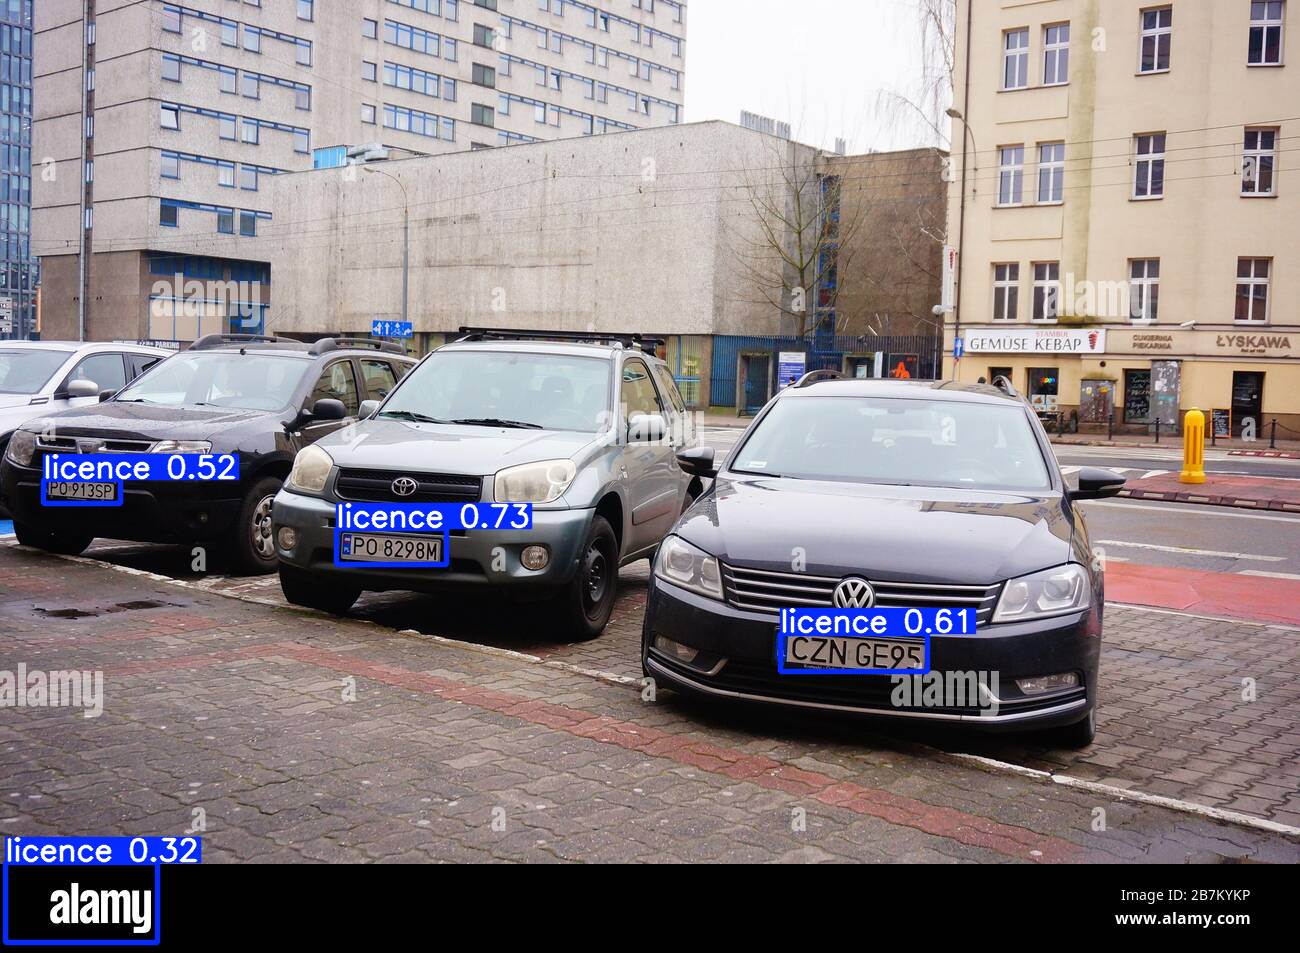

In [ ]:
# Display the image with predictions (assuming the result is from a single image)
results[0].show()  # This will display the first image in the results list
